In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import plotly.express as px
import pandas_profiling

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from pandas_profiling import ProfileReport
from scipy import stats

In [2]:
# import csv
df = pd.read_csv('./paises.csv', sep=',')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Argentina,ARG,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,20.310698,28.871842,25.591154,28.774617,21.232935,...,23.948798,40.282972,26.579992,41.119380,26.006379,42.033669,50.921499,39.891217,54.072764,NaN
1,Bolivia,BOL,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,6.548173,3.561471,0.824215,8.385943,5.891025,...,5.995388,2.049498,-4.620602,-1.354871,6.061400,3.056266,-0.693003,-1.854387,3.966970,NaN
2,"Venezuela, RB",VEN,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,2.013731,0.665054,4.919830,-0.366503,2.167209,...,35.502675,40.440490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# drop Indicator Code and Unnamed: 66
df.drop(['Indicator Code', 'Unnamed: 66'], axis=1, inplace=True)

# Graficas Inflacion

In [20]:
# Menu for the user to choose the country number
print('Choose a country from the list below:')
print('1. Argentina')
print('2. Bolivia')
print('3. Venezuela')
country = int(input('Enter the number of the country: '))
if country == 1:
    df_country = df[0:1]
elif country == 2:
    df_country = df[1:2]
elif country == 3:
    df_country = df[2:3]
else:
    print('Invalid option')

Choose a country from the list below:
1. Argentina
2. Bolivia
3. Venezuela


In [21]:
df_country.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Bolivia,BOL,"Inflation, GDP deflator (annual %)",NaN,6.548173,3.561471,0.824215,8.385943,5.891025,3.315876,...,7.100276,5.995388,2.049498,-4.620602,-1.354871,6.0614,3.056266,-0.693003,-1.854387,3.96697


In [22]:
# drop the three first columns
df_country.drop(['Country Name', 'Country Code', 'Indicator Name'], axis=1, inplace=True)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_51100\2042714434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.drop(['Country Name', 'Country Code', 'Indicator Name'], axis=1, inplace=True)


In [23]:
# replace NaN with 0
df_country.fillna(0, inplace=True)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_51100\393512385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.fillna(0, inplace=True)


In [24]:
# a for to create a array with the values of the columns
inflacion = []
for i in df_country.columns:
    inflacion.append(df_country[i].values[0])

inflacion

[0.0,
 6.54817331849735,
 3.56147105600473,
 0.824214662302779,
 8.3859430532427,
 5.89102517358364,
 3.31587642820679,
 6.23245861722945,
 4.5884842403546,
 3.71900826476657,
 3.96056114698928,
 2.53863226297418,
 18.9777488047166,
 42.9445090900202,
 61.5459604674601,
 6.69527765368763,
 8.5989208742604,
 12.5406184290034,
 14.1038108089384,
 19.7971736389825,
 25.0489435882232,
 29.4860358871244,
 158.282749784618,
 265.197960314747,
 1443.39728586554,
 12338.6602150646,
 230.105222284287,
 14.5841938238962,
 17.5233370962606,
 13.1864212740411,
 16.2679419846371,
 17.6894402203167,
 13.1992044095149,
 6.5571581914609,
 7.95220772509668,
 11.4272817104485,
 11.5802068693934,
 5.70504335822339,
 7.05112676533632,
 2.41156588906529,
 5.19540520801752,
 1.87009365776751,
 2.82075739734616,
 6.32999229252485,
 7.96770950924268,
 5.94079763021928,
 13.6636795403543,
 7.37335386111839,
 10.381181762675,
 -2.41989432827502,
 8.77750811554523,
 14.6023542400665,
 7.10027550115058,
 5.995388

In [25]:
# a for to create another array with the years
years = []
for i in df_country.columns:
    years.append(i)

years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [27]:
media = np.mean(inflacion)
desvio = np.std(inflacion)
print('Media: ', media)
print('Desvio: ', desvio)

Media:  241.48860135217282
Desvio:  1559.9325647117912


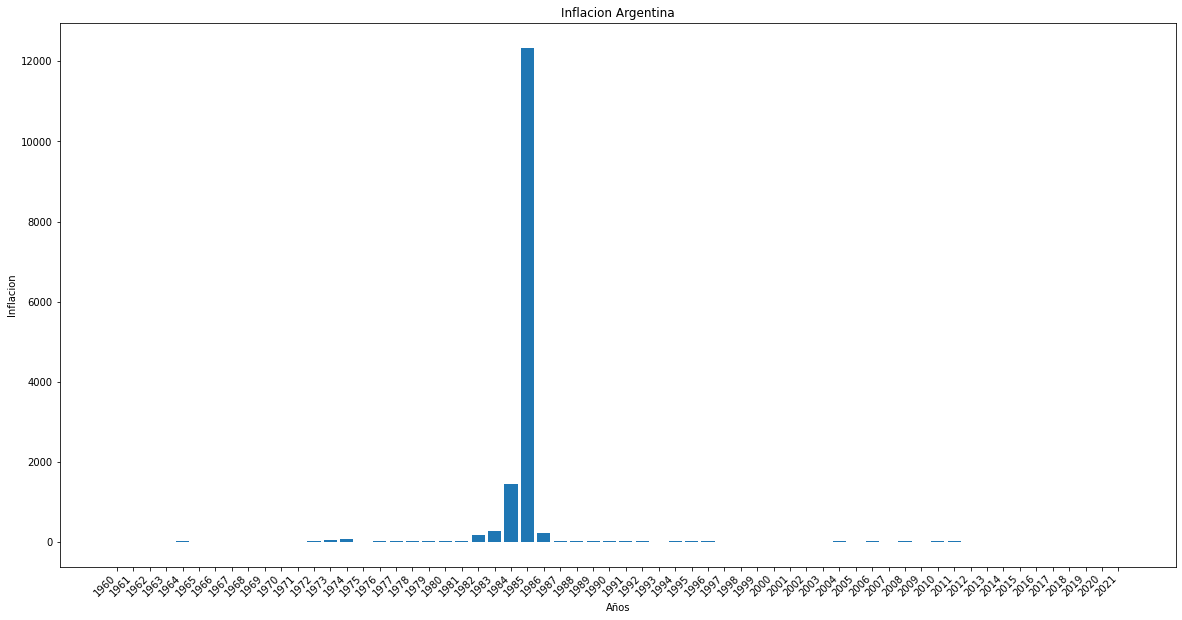

In [28]:
# Bar plot
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.bar(years, inflacion)
plt.title('Inflacion')
plt.xlabel('Años')
plt.ylabel('Inflacion')
plt.show()

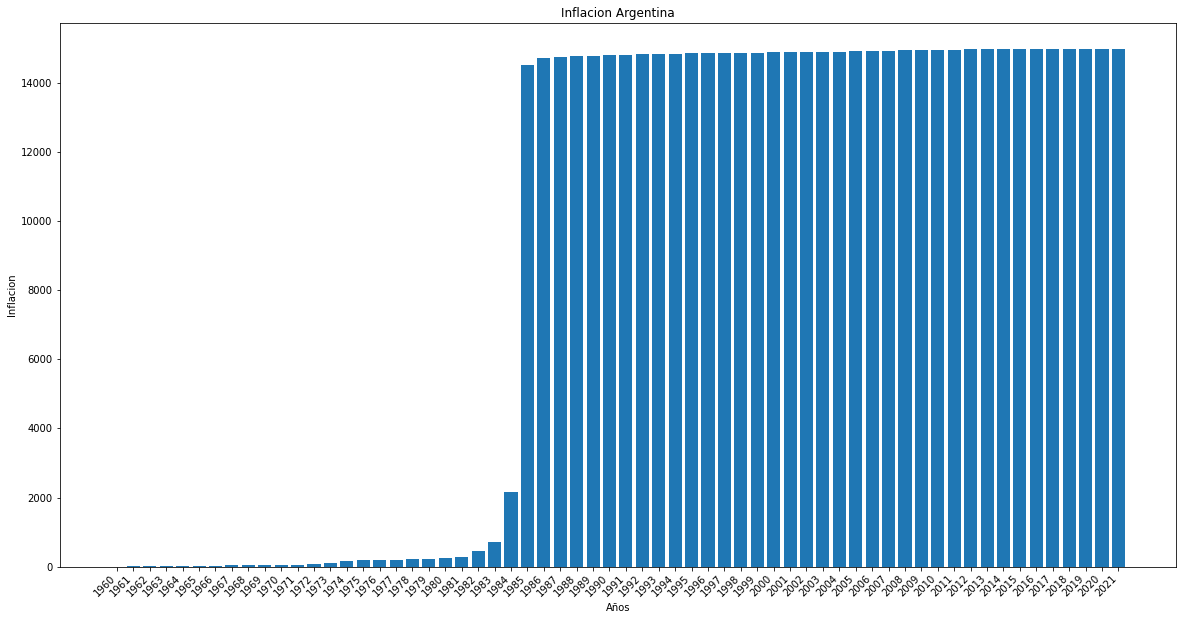

In [29]:
# cumulative sum with bars
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.bar(years, np.cumsum(inflacion))
plt.title('Inflacion')
plt.xlabel('Años')
plt.ylabel('Inflacion')
plt.show()

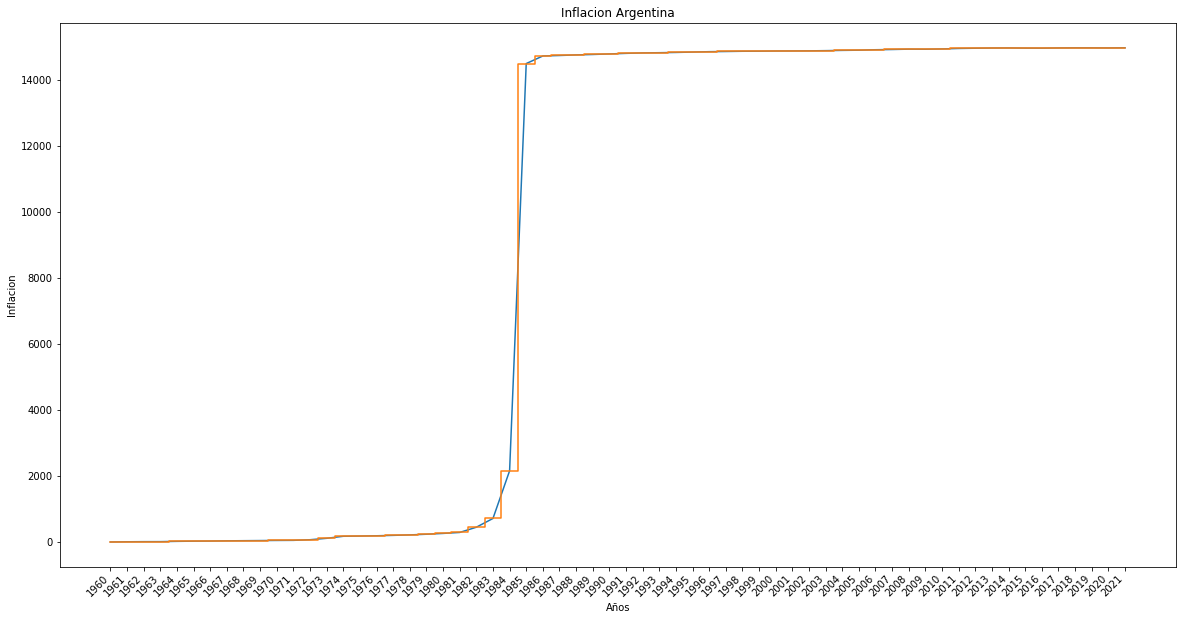

In [30]:
# cumulative staggered
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.plot(years, np.cumsum(inflacion))
plt.step(years, np.cumsum(inflacion), where='mid')
plt.title('Inflacion')
plt.xlabel('Años')
plt.ylabel('Inflacion')
plt.show()

In [31]:
# get cumulative sum with a for
inflacion_acumulada = []
for i in range(len(inflacion)):
    if i == 0:
        inflacion_acumulada.append(inflacion[i])
    else:
        inflacion_acumulada.append(inflacion[i] + inflacion_acumulada[i-1])

# use inflacion_acumulada and divide with the max value of inflacion_acumulada
inflacion_acumulada_2 = np.array(inflacion_acumulada) / max(inflacion_acumulada)

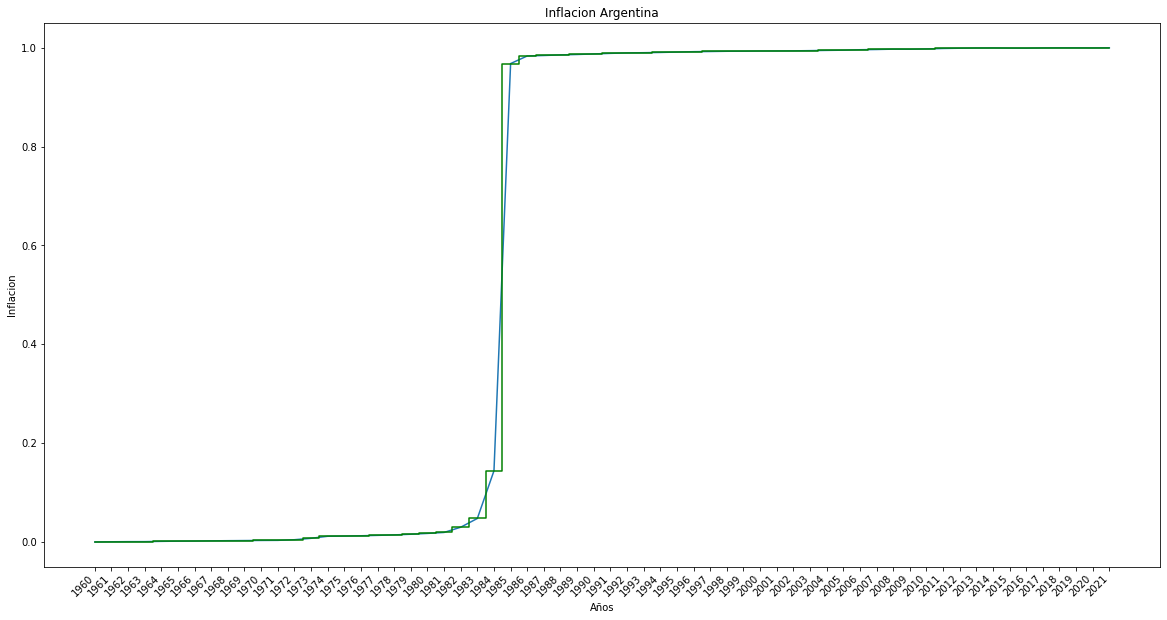

In [32]:
# cumulative staggered
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
plt.plot(years, np.array(inflacion_acumulada_2))
plt.step(years, np.array(inflacion_acumulada_2), where='mid', color="g")
plt.title('Inflacion')
plt.xlabel('Años')
plt.ylabel('Inflacion')
plt.show()

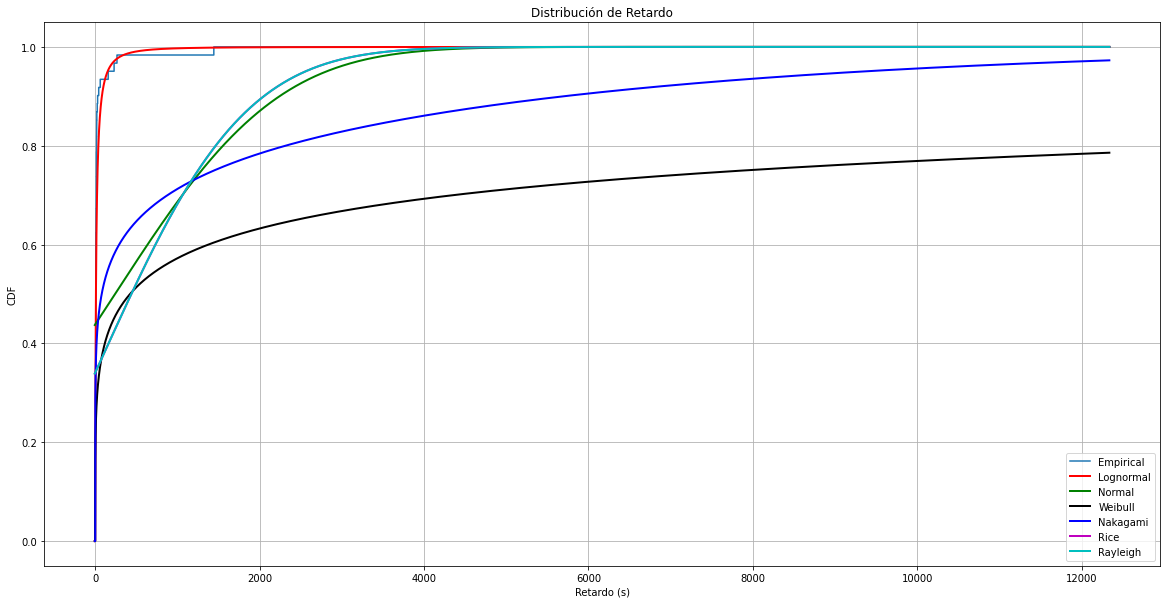

In [34]:
# cumulative staggered
retardo_novo = inflacion
x1 = np.where(retardo_novo == 0)
retardo_novo = np.delete(retardo_novo, x1)
retardo_rms = np.abs(retardo_novo)

p = np.sort(inflacion)
maximo = np.max(p)
minimo = np.min(p)
vrms = np.arange(minimo, maximo, 0.002)
tam_p = np.size(p)
percentual = 1/tam_p

dist_cum_retRMS = []
for i in vrms:
    dist_cum_retRMS.append(np.size(np.where(p <= i)) * percentual)


dist_cum_retRMS = np.array(dist_cum_retRMS) / np.max(dist_cum_retRMS)

# CDF LogNormal
param_logn = stats.lognorm.fit(retardo_rms)
l = stats.lognorm.cdf(vrms, param_logn[0], param_logn[1], param_logn[2])

# CDF Normal
param_norm = stats.norm.fit(retardo_rms)
norm = stats.norm.cdf(vrms, param_norm[0], param_norm[1])

# CDF Weibull
param_weibull = stats.weibull_min.fit(retardo_rms)
w = stats.weibull_min.cdf(vrms, param_weibull[0], param_weibull[1], param_weibull[2])

# CDF Nakagami Teórica
param_nakagami = stats.nakagami.fit(retardo_rms)
n = stats.nakagami.cdf(vrms, param_nakagami[0], param_nakagami[1], param_nakagami[2])

# CDF Rice Teórica
param_rice = stats.rice.fit(retardo_rms)
r = stats.rice.cdf(vrms, param_rice[0], param_rice[1], param_rice[2])

# CDF Rayleigh Teórica
param_rayl = stats.rayleigh.fit(retardo_rms)
ry = stats.rayleigh.cdf(vrms, param_rayl[0], param_rayl[1])

plt.subplots(figsize=(20, 10))
plt.step(vrms, dist_cum_retRMS)
plt.plot(vrms, l, 'r', linewidth=2)
plt.plot(vrms, norm, 'g', linewidth=2)
plt.plot(vrms, w, 'k', linewidth=2)
plt.plot(vrms, n, 'b', linewidth=2)
plt.plot(vrms, r, 'm', linewidth=2)
plt.plot(vrms, ry, 'c', linewidth=2)
plt.legend(['Empirical', 'Lognormal', 'Normal', 'Weibull', 'Nakagami', 'Rice', 'Rayleigh'])
plt.title('Distribución de Retardo')
plt.xlabel('Retardo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()



In [ ]:
# Datos Empiricos
# complex conjugate transpose of dist_cum_retRMS
Dados_Emp = np.conj(dist_cum_retRMS)
# 1) CDF LogNormal Teórica
LogN = l
# 2) CDF Normal Teórica
NormT = norm
# 3) CDF Weibull Teórica
WeiT = w
# 4) CDF Nakagami Teórica
NakT = n
# 5) CDF Rice Teórica
RicT = r
# 6) CDF Rayleigh Teórica
RayT = ry

# Medida de error
ME_LogN = np.mean(LogN-Dados_Emp)
ME_NormT = np.mean(NormT-Dados_Emp)
ME_WeiT = np.mean(WeiT-Dados_Emp)
ME_NakT = np.mean(NakT-Dados_Emp)
ME_RicT = np.mean(RicT-Dados_Emp)
ME_RayT = np.mean(RayT-Dados_Emp)

# Desviación estándar del error
Tam_DE = np.size(Dados_Emp)
Sigma_LogN = np.sqrt(np.sum(((LogN-Dados_Emp)-ME_LogN)**2)/(Tam_DE-1))
Sigma_NormT = np.sqrt(np.sum(((NormT-Dados_Emp)-ME_NormT)**2)/(Tam_DE-1))
Sigma_WeiT = np.sqrt(np.sum(((WeiT-Dados_Emp)-ME_WeiT)**2)/(Tam_DE-1))
Sigma_NakT = np.sqrt(np.sum(((NakT-Dados_Emp)-ME_NakT)**2)/(Tam_DE-1))
Sigma_RicT = np.sqrt(np.sum(((RicT-Dados_Emp)-ME_RicT)**2)/(Tam_DE-1))
Sigma_RayT = np.sqrt(np.sum(((RayT-Dados_Emp)-ME_RayT)**2)/(Tam_DE-1))

# Error cuadrático medio de la raíz
ErrorCuadraticoLogaritmicaNormal = np.sqrt(np.mean((LogN-Dados_Emp)**2))
ErrorCuadraticoNormal = np.sqrt(np.mean((NormT-Dados_Emp)**2))
ErrorCuadraticoWeibull = np.sqrt(np.mean((WeiT-Dados_Emp)**2))
ErrorCuadraticoNakagami = np.sqrt(np.mean((NakT-Dados_Emp)**2))
ErrorCuadraticoRice = np.sqrt(np.mean((RicT-Dados_Emp)**2))
ErrorCuadraticoRayleigh = np.sqrt(np.mean((RayT-Dados_Emp)**2))

print('Error cuadrático medio de la raíz')
print('Logaritmica Normal: ', ErrorCuadraticoLogaritmicaNormal)
print('Nakagami: ', ErrorCuadraticoNakagami)
print('Normal: ', ErrorCuadraticoNormal)
print('Rayleigh: ', ErrorCuadraticoRayleigh)
print('Rice: ', ErrorCuadraticoRice)
print('Weibull: ', ErrorCuadraticoWeibull)




Error cuadrático medio de la raíz
Logaritmica Normal:  0.017751742763156712
Nakagami:  0.09975554112284991
Normal:  0.12174727728444926
Rayleigh:  0.13144420834857157
Rice:  0.13144420864533535
Weibull:  0.02305233467555124
